In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools
import wrangle as w

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

Imports Successful


In [2]:
directory='/Users/chellyannmoreno/codeup-data-science/project_anomaly/'
filename='logs.csv'
df=w.get_logs(directory,filename)

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [4]:
df=w.prep_logs(df)

In [5]:
df.head()

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
0,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:55:03,web dev,,
1,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:02,web dev,NaN,java-ii
2,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:05,web dev,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:06,web dev,slides,object_oriented_programming
4,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2018-01-26 09:56:24,web dev,javascript-i,conditionals


##  2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [15]:
df=df[df.cohort!='Staff']

In [16]:
df.groupby(['cohort','lesson']).size()

cohort     lesson          
Andromeda                      1176
           1-fundamentals         6
           3-sql                  1
           7-classification       2
           743                    1
                               ... 
Zion       ui                     1
           uploads                2
           ux                     2
           web-design             1
           whack-a-mole          12
Length: 2247, dtype: int64

In [17]:
df.groupby(['cohort','lesson']).size() / len(df)

cohort     lesson          
Andromeda                      0.001541
           1-fundamentals      0.000008
           3-sql               0.000001
           7-classification    0.000003
           743                 0.000001
                                 ...   
Zion       ui                  0.000001
           uploads             0.000003
           ux                  0.000003
           web-design          0.000001
           whack-a-mole        0.000016
Length: 2247, dtype: float64

In [21]:
cohort_lesson=df.groupby('lesson').cohort.value_counts(normalize=True).rename('prob').reset_index().sort_values(by='prob',ascending=False).head(10)
cohort_lesson

,lesson,cohort,prob
1854,promises,Yosemite,1.0
1863,quic,Yosemite,1.0
748,elements,Voyageurs,1.0
144,7-more-topics,Bayes,1.0
145,743,Andromeda,1.0
1853,project,Darden,1.0
1085,htmle-css,Andromeda,1.0
1862,query,Yosemite,1.0
1873,quize,Wrangell,1.0
1998,sgithubtudents,Deimos,1.0


In [19]:
cohort_lesson_bottom=df.groupby('lesson').cohort.value_counts(normalize=True).rename('prob').reset_index().sort_values(by='prob',ascending=True).head(10)


In [20]:
cohort_lesson_bottom

,lesson,cohort,prob
1418,javascript-i,Bayes,0.000020
1622,mysql,Ike,0.000020
43,,Apollo,0.000025
44,,Denali,0.000025
45,,Everglades,0.000025
1308,java-ii,Curie,0.000026
1309,java-ii,Joshua,0.000026
1310,java-ii,Oberon,0.000026
962,fundamentals,Franklin,0.000028
963,fundamentals,Glacier,0.000028


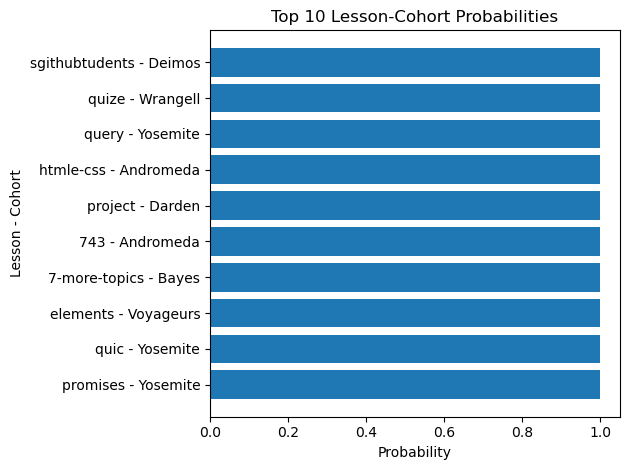

In [22]:
import matplotlib.pyplot as plt

# Assuming you have imported the necessary libraries and have the 'cohort_lesson' DataFrame

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.barh(cohort_lesson['lesson'] + ' - ' + cohort_lesson['cohort'], cohort_lesson['prob'])

# Set labels and title
ax.set_xlabel('Probability')
ax.set_ylabel('Lesson - Cohort')
ax.set_title('Top 10 Lesson-Cohort Probabilities')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


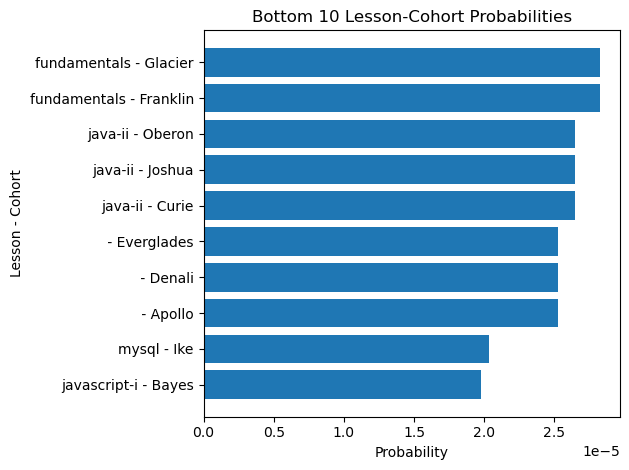

In [23]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.barh(cohort_lesson_bottom['lesson'] + ' - ' + cohort_lesson_bottom['cohort'], cohort_lesson_bottom['prob'])

# Set labels and title
ax.set_xlabel('Probability')
ax.set_ylabel('Lesson - Cohort')
ax.set_title('Bottom 10 Lesson-Cohort Probabilities')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

 ## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [ ]:
df.sample(6)

In [49]:
grads_webdev = df[(df['end_date'] > df['access_date']) & (df['program'] == 'web dev')].groupby(['program', 'lesson']).size().sort_values(ascending=False)


In [61]:
grads_webdev.sort_values(ascending=False)

program  lesson                      
web dev  javascript-i                    45026
         mysql                           43898
         java-ii                         33237
         java-iii                        31735
                                         23422
                                         ...  
         11-nlp                              1
         control-statements-and-loops        1
         2-storytelling                      1
         simple-simon                        1
         intruduction                        1
Length: 119, dtype: int64

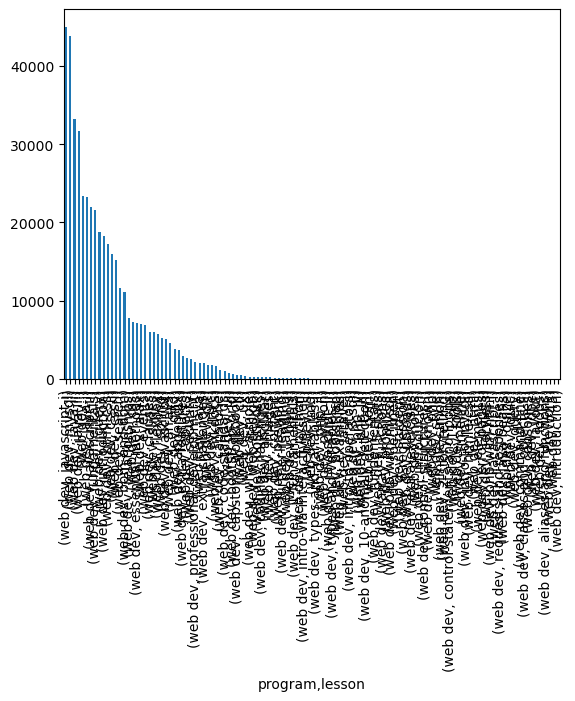

In [56]:
grads_webdev.plot.bar()
plt.show()

In [51]:
grads_ds = df[(df['end_date'] > df['access_date']) & (df['program'] == 'data science')].groupby(['program', 'lesson']).size().sort_values(ascending=False)


In [60]:
grads_ds.sort_values(ascending=False)

program       lesson                  
data science  classification              7582
              1-fundamentals              7469
                                          6912
              fundamentals                6705
              sql                         6458
              3-sql                       5657
              python                      4984
              4-python                    4626
              6-regression                4187
              5-stats                     3204
              7-classification            2940
              stats                       2926
              regression                  2609
              cli                         2300
              10-anomaly-detection        2009
              clustering                  1997
              8-clustering                1935
              appendix                    1785
              11-nlp                      1716
              search                      1710
              anomaly

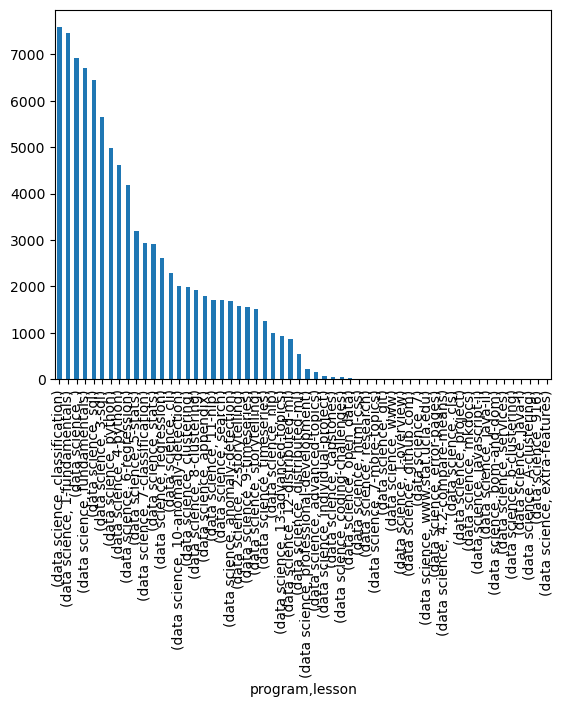

In [55]:
grads_ds.plot.bar()
plt.show()

In [53]:
grads_fend = df[(df['end_date'] > df['access_date']) & (df['program'] == 'frontend')].groupby(['program', 'lesson']).size().sort_values(ascending=False)


In [62]:
grads_fend.sort_values(ascending=False)

Series([], dtype: int64)

## 7. Which lessons are least accessed?

In [63]:
least_lesson1=(df[df.lesson!='']).groupby('lesson').access_date.value_counts(normalize=True).rename('prob').reset_index().sort_values(by='prob',ascending=True)


In [64]:
ip_lesson=df.groupby('lesson').access_date.value_counts(normalize=True).rename('prob').reset_index().sort_values(by='prob',ascending=True)


In [65]:
df.endpoint.value_counts().sort_values(ascending=True).head(50)

13.01.02_Create                         1
7.00_Intro                              1
7._Clustering                           1
6.05_Deliver                            1
6.04.07_Ensemble                        1
10._NLP                                 1
10.01_Acquire_WebScraping               1
10.00_Intro.html                        1
10.02.01_ParseText                      1
13.02_Tableau                           1
13.01.04_Present                        1
13.01.03_Refine                         1
13.01.02.04_Prototype                   1
7.01_Acquire                            1
13.01.02.03_Sketch                      1
13.01.02.01_Prep                        1
13.01.01_Understand                     1
11.04_Modeling.md                       1
6.04.05_SVM                             1
11.03_Explore.md                        1
10.10_Exercises                         1
10.04.05_TopicModeling                  1
10.04.04_TextClassification             1
10.04.03_SentimentAnalysis        

In [66]:
df.groupby('lesson').access_date.count().sort_values(ascending=True).head(50)

lesson
elements                        1
sub_units                       1
743                             1
jacascript-i                    1
intruduction                    1
916                             1
A-clustering                    1
PreWork                         1
quic                            1
submit                          1
requests-and-responses          1
tools                           1
htmle-css                       1
capsones                        1
timeline                        1
b-clustering                    1
query                           1
quize                           1
style                           1
java-beans                      1
elements-i                      1
sgithubtudents                  1
loops                           1
servlets                        1
layout                          1
cls                             1
control-statements-and-loops    1
jdbc                            1
services                        1
forms-i

In [67]:
least_lessons=df.groupby('lesson').ip.count().sort_values(ascending=True).head(20)
least_lessons

lesson
elements                  1
sub_units                 1
743                       1
jacascript-i              1
intruduction              1
916                       1
A-clustering              1
PreWork                   1
quic                      1
submit                    1
requests-and-responses    1
tools                     1
htmle-css                 1
capsones                  1
timeline                  1
b-clustering              1
query                     1
quize                     1
style                     1
java-beans                1
Name: ip, dtype: int64

In [71]:
least_lesson1.sort_values(by='prob',ascending=True)


,lesson,access_date,prob
384446,javascript-i,2020-03-26 19:41:17,0.00002
355214,javascript-i,2018-01-31 15:54:07,0.00002
355215,javascript-i,2018-01-31 15:55:51,0.00002
355228,javascript-i,2018-01-31 16:24:46,0.00002
355216,javascript-i,2018-01-31 15:59:26,0.00002
...,...,...,...
33647,743,2019-05-31 15:21:09,1.00000
573836,timeline,2020-12-03 09:01:39,1.00000
575415,tools,2021-01-25 11:59:11,1.00000
573834,submit,2019-09-17 11:25:48,1.00000
